<a href="https://colab.research.google.com/github/Naveen032006/Computer-vision/blob/main/EXEC_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Quality**

Exercise 3:

Data Quality  - Identifying Missing Values, Irregular Cardinality, and Outliers

Objective:
Develop a Data Quality Report by programmatically identifying missing values, irregular cardinality, and outliers using Python.

1. Data Loading & Preprocessing

Load a structured dataset (CSV, Excel, or SQL).


Perform basic exploratory analysis (df.info(), df.describe(), df.head()).


Convert data types if necessary (e.g., categorical encoding, datetime conversion).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [ ]:
df=pd.read_csv("/content/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Identifying Missing Values

Compute the missing value percentage for each feature.


Classify features as:


* No Missing Values (0%)


* Low Missingness (1-5%)


* Moderate Missingness (5-20%)


* High Missingness (>20%)


Use heatmaps (seaborn/matplotlib) and bar plots to visualize missingness.


Suggest appropriate handling techniques (e.g., imputation, deletion).

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Feature': df.columns,
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_data[missing_data['Missing Values'] > 0])

           Feature  Missing Values  Missing Percentage
Age            Age             177           19.865320
Cabin        Cabin             687           77.104377
Embarked  Embarked               2            0.224467


In [ ]:
missing_values=df.isnull().sum()
missing_percentage=missing_values/len(df)*100
no_missing=[]
low_missing=[]
moderate_missing=[]
high_missing=[]
for column, percentage in missing_percentage.items():
    if percentage == 0:
        no_missing.append(column)
    elif 1 <= percentage <= 5:
        low_missing.append(column)
    elif 5 < percentage <= 20:
        moderate_missing.append(column)
    elif percentage > 20:
        high_missing.append(column)

# Display classification results
print("No Missing Values (0%):", no_missing)
print("Low Missingness (1-5%):", low_missing)
print("Moderate Missingness (5-20%):", moderate_missing)
print("High Missingness (>20%):", high_missing)

No Missing Values (0%): ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare']
Low Missingness (1-5%): []
Moderate Missingness (5-20%): ['Age']
High Missingness (>20%): ['Cabin']


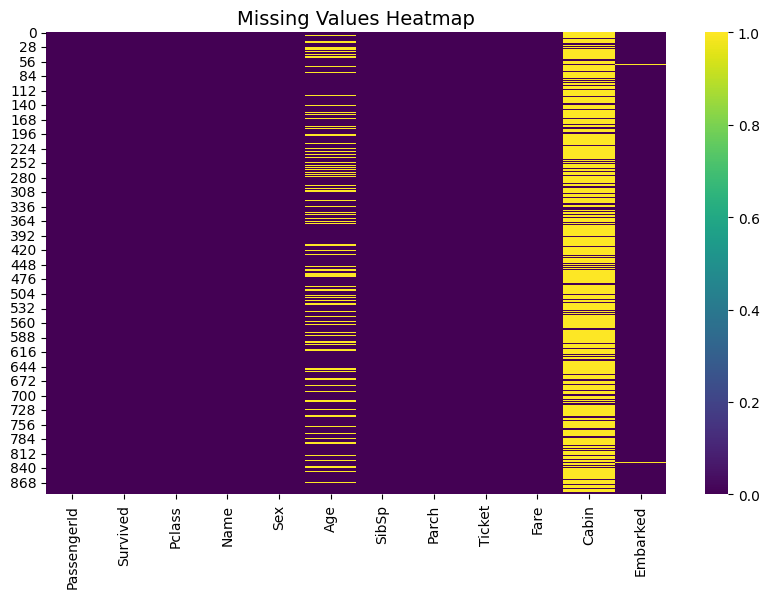

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()

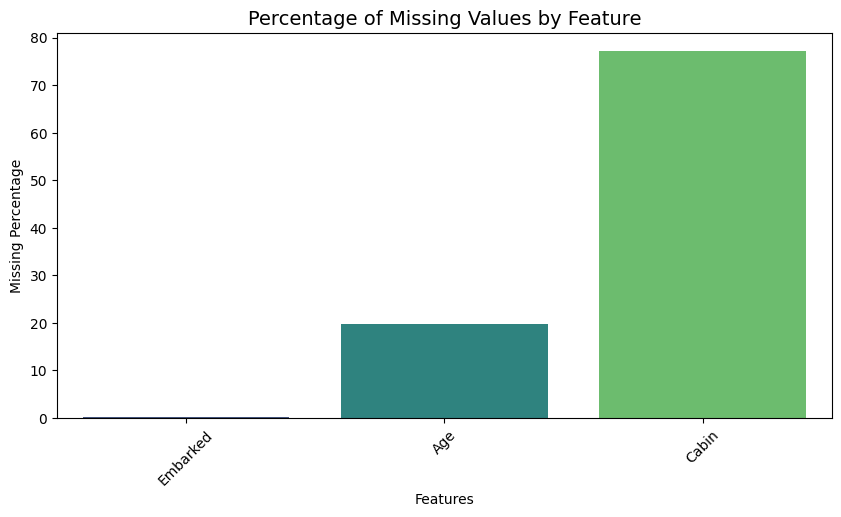

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0.01].sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette="viridis")
plt.ylabel("Missing Percentage")
plt.xlabel("Features")
plt.title("Percentage of Missing Values by Feature", fontsize=14)
plt.xticks(rotation=45)
plt.show()

**handling missing values in Age column**

Mean/Median Imputation:

When to use: For numerical features with small to moderate missingness.
Advantages: Simple and fast.
Disadvantages: May introduce bias, especially if the data is not normally distributed.

**handling missing values in cabin column**

Reason for deletion:   The Cabin column has a high percentage of missing values (77%). This makes it difficult to impute meaningfully because there may not be enough data to identify a clear pattern or relationship.

Recommended Handling:  
Deletion:    Since the majority of the data is missing, and it may not provide significant value in predicting survival, remove the Cabin column.

**handling missing values in embark column**

Reason for imputation: The Embarked column has only about 0.2% missing values. This is a relatively small amount

Recommended Handling:
Imputation: Since the missingness is low, you can impute the missing values using the mode (the most frequent value) of the column.


3. Detecting Irregular Cardinality


Compute cardinality (number of unique values) for all categorical features.


Identify:


* Low Cardinality (less than 10 unique values, e.g., gender, product category)


* Expected Cardinality (moderate number of unique values)


* High Cardinality (unexpectedly high unique values, e.g., customer IDs)


Flag potential data quality issues, such as incorrectly encoded categorical features.


Use bar plots or count plots to visualize distributions.

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [ ]:
cardinality = df.nunique()
print(cardinality)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


**Low Cardinality** : Survived, Pclass, Sex, Sibsp, Parch, Embarked


**Expected Cardinality** : Age, Cabin


**High Cardinality** : Passengerid, Name, Ticket

In [ ]:
df['Survived'] = df['Survived'].replace({0: 'No', 1: 'Yes'})
print(df[['Survived']].head())


  Survived
0       No
1      Yes
2      Yes
3      Yes
4       No


In [ ]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


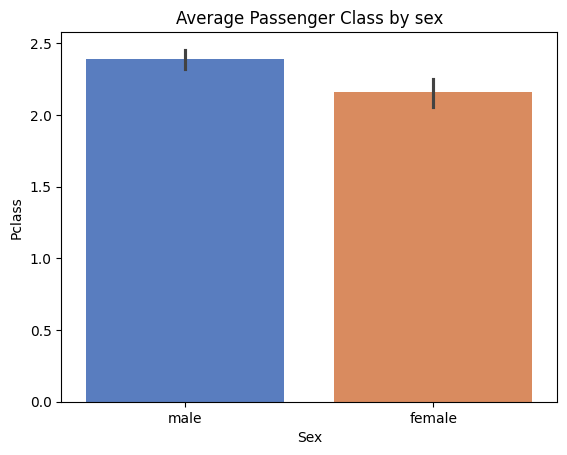

In [ ]:
sns.barplot(x='Sex', y='Pclass', data=df, palette='muted')
plt.title('Average Passenger Class by sex')
plt.xlabel('Sex')
plt.ylabel('Pclass')
plt.show()


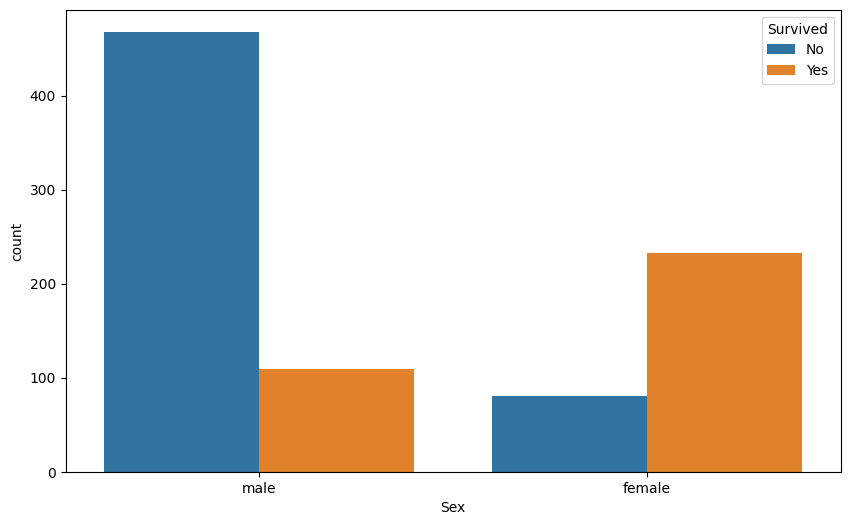

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',hue='Survived',data=df)
plt.show()

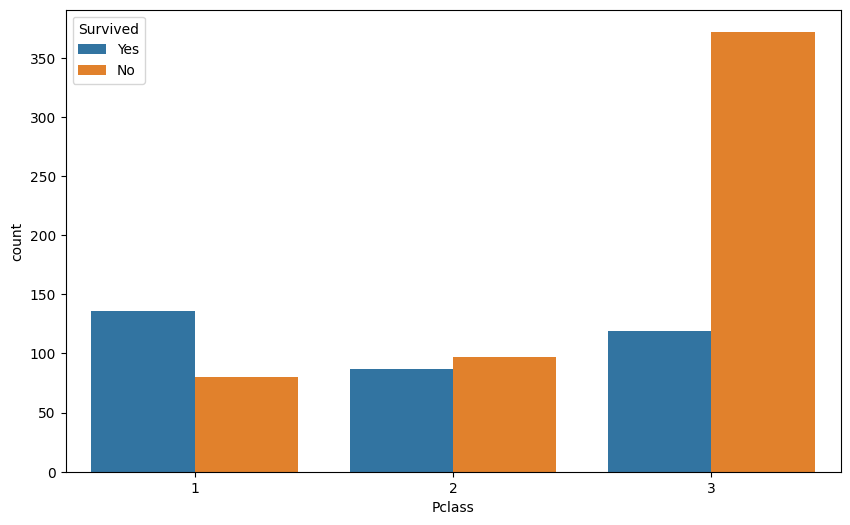

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.show()

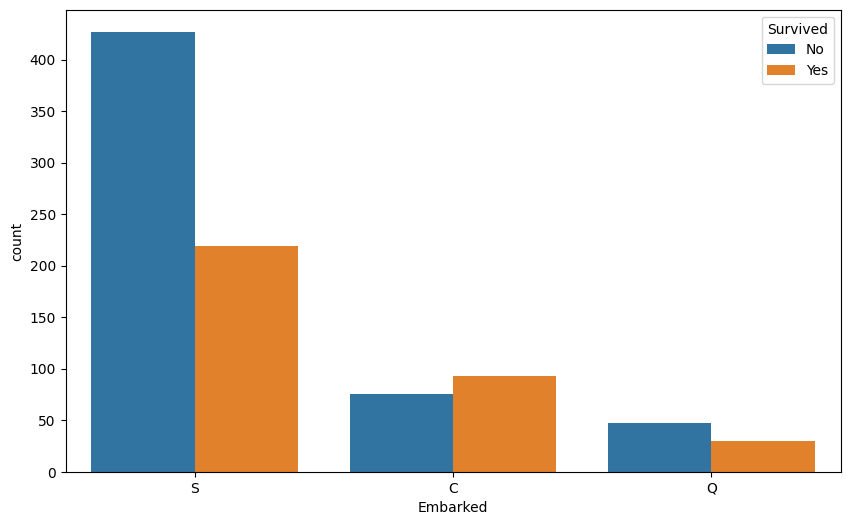

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.show()

4. Identifying Outliers

Detect outliers using at least two statistical methods:

* Interquartile Range (IQR) Method: Define outliers as values outside 1.5 * IQR.

* Z-score Method: Identify values with Z-scores beyond ±3.

Use box plots and scatter plots to visualize outliers.

Identify potential data entry errors or legitimate extreme values.

In [ ]:
age=df['Age']
q1=age.quantile(0.25)
q3=age.quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower)
print(upper)

2.5
54.5


In [ ]:
outliers=df[(df['Age']<lower) | (df['Age']>upper)]
print(outliers)

     PassengerId Survived  Pclass  \
7              8       No       3   
11            12      Yes       1   
15            16      Yes       2   
16            17       No       3   
33            34       No       2   
..           ...      ...     ...   
827          828      Yes       2   
829          830      Yes       1   
831          832      Yes       2   
851          852       No       3   
879          880      Yes       1   

                                              Name     Sex    Age  SibSp  \
7                   Palsson, Master. Gosta Leonard    male   2.00      3   
11                        Bonnell, Miss. Elizabeth  female  58.00      0   
15                Hewlett, Mrs. (Mary D Kingcome)   female  55.00      0   
16                            Rice, Master. Eugene    male   2.00      4   
33                           Wheadon, Mr. Edward H    male  66.00      0   
..                                             ...     ...    ...    ...   
827                    

In [ ]:
print(f"Number of outliers present: {len(outliers)}")

Number of outliers present: 66


In [ ]:
df['Z-Score'] = zscore(df['Age'])

outliers_z = df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)]

print("Outliers based on Z-score method:")
print(outliers_z)

Outliers based on Z-score method:
     PassengerId Survived  Pclass                                  Name   Sex  \
96            97       No       1             Goldschmidt, Mr. George B  male   
116          117       No       3                  Connors, Mr. Patrick  male   
493          494       No       1               Artagaveytia, Mr. Ramon  male   
630          631      Yes       1  Barkworth, Mr. Algernon Henry Wilson  male   
672          673       No       2           Mitchell, Mr. Henry Michael  male   
745          746       No       1          Crosby, Capt. Edward Gifford  male   
851          852       No       3                   Svensson, Mr. Johan  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked   Z-Score  
96   71.0      0      0    PC 17754  34.6542    A5        C  3.178283  
116  70.5      0      0      370369   7.7500   NaN        Q  3.139805  
493  71.0      0      0    PC 17609  49.5042   NaN        C  3.178283  
630  80.0      0      0      

In [ ]:
print(f"Number of outliers present: {len(outliers_z)}")

Number of outliers present: 7


In [ ]:
fare=df['Fare']
q1=fare.quantile(0.25)
q3=fare.quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(lower)
print(upper)

-26.724
65.6344


In [ ]:
outliers=df[(df['Fare']<lower) | (df['Fare']>upper)]
print(outliers)

     PassengerId Survived  Pclass  \
1              2      Yes       1   
27            28       No       1   
31            32      Yes       1   
34            35       No       1   
52            53      Yes       1   
..           ...      ...     ...   
846          847       No       3   
849          850      Yes       1   
856          857      Yes       1   
863          864       No       3   
879          880      Yes       1   

                                                  Name     Sex        Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
27                      Fortune, Mr. Charles Alexander    male  19.000000   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  29.699118   
34                             Meyer, Mr. Edgar Joseph    male  28.000000   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.000000   
..                                                 ...     ...        ...   
846             

In [ ]:
print(f"Number of outliers present: {len(outliers)}")

Number of outliers present: 116


In [ ]:
df['Z-Score'] = zscore(df['Fare'])

outliers_z = df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)]

print("Outliers based on Z-score method:")
print(outliers_z)

Outliers based on Z-score method:
     PassengerId Survived  Pclass  \
27            28       No       1   
88            89      Yes       1   
118          119       No       1   
258          259      Yes       1   
299          300      Yes       1   
311          312      Yes       1   
341          342      Yes       1   
377          378       No       1   
380          381      Yes       1   
438          439       No       1   
527          528       No       1   
557          558       No       1   
679          680      Yes       1   
689          690      Yes       1   
700          701      Yes       1   
716          717      Yes       1   
730          731      Yes       1   
737          738      Yes       1   
742          743      Yes       1   
779          780      Yes       1   

                                                  Name     Sex        Age  \
27                      Fortune, Mr. Charles Alexander    male  19.000000   
88                          Fortun

In [ ]:
print(f"Number of outliers present: {len(outliers_z)}")

Number of outliers present: 20


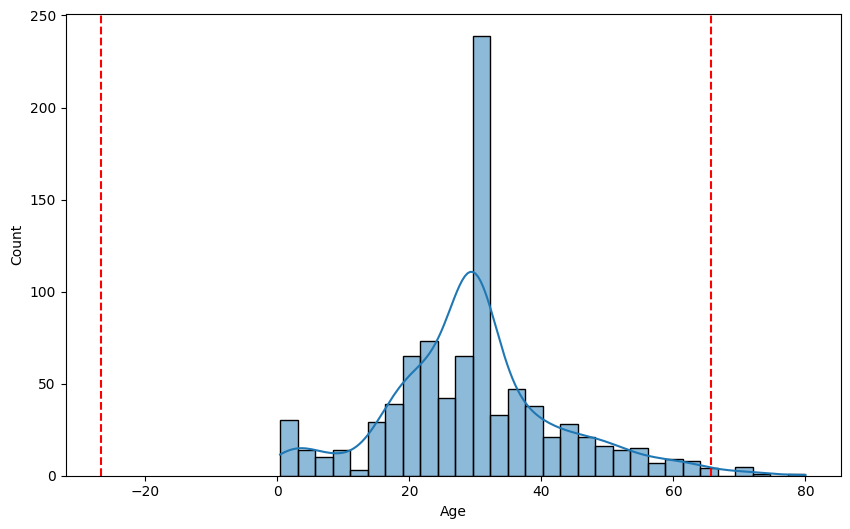

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde=True)
plt.axvline(x=lower, color='red', linestyle='--', label=f'Lower Bound ({lower:.2f})')
plt.axvline(x=upper, color='red', linestyle='--', label=f'Upper Bound ({upper:.2f})')
plt.show()

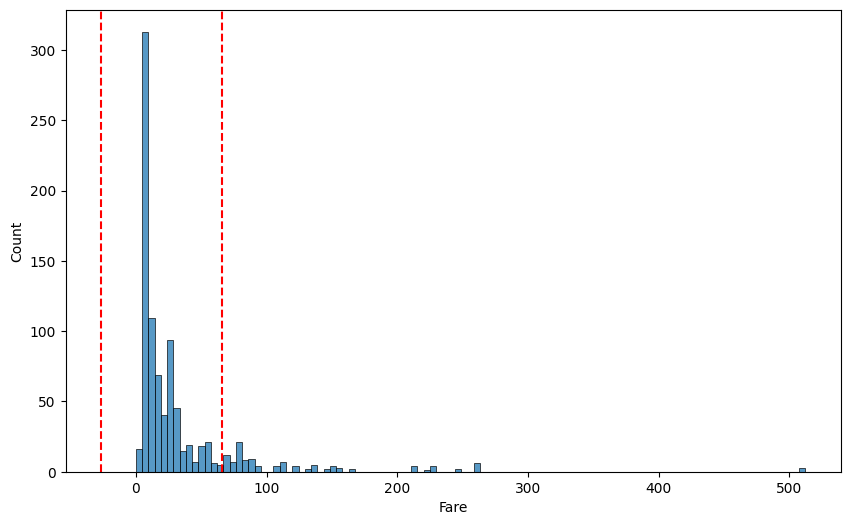

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Fare'])
plt.axvline(x=lower, color='red', linestyle='--', label=f'Lower Bound ({lower:.2f})')
plt.axvline(x=upper, color='red', linestyle='--', label=f'Upper Bound ({upper:.2f})')
plt.show()

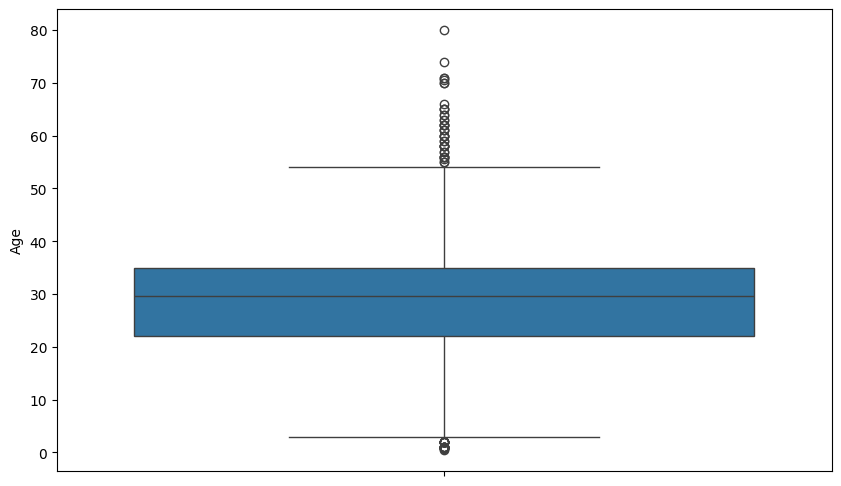

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Age'])
plt.show()


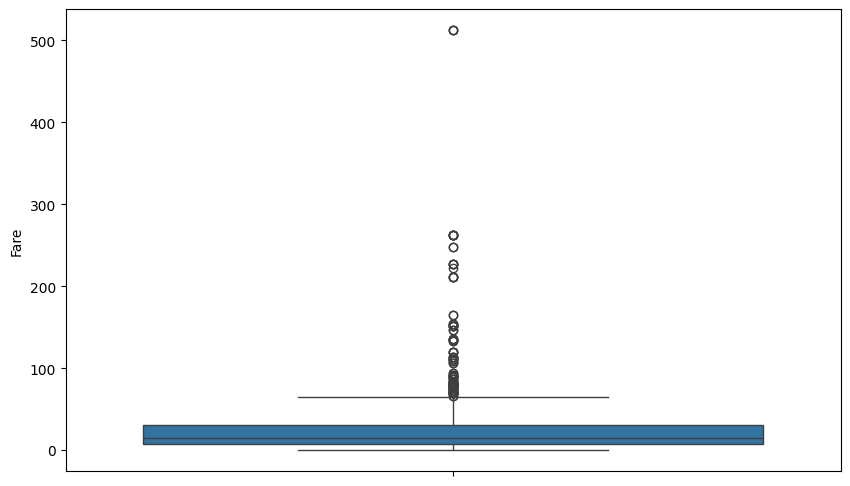

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Fare'])
plt.show()


5. Data Quality Report Generation

Generate a structured summary report including:

* Missing value statistics (percentage, feature classification).

* Irregular cardinality features with unique counts.

* Outlier summary (number of outliers per feature).

Provide insights and recommendations for data cleaning.

**Missing value statistics**

**handling missing values in Age column**

Mean/Median Imputation:

When to use: For numerical features with small to moderate missingness.
Advantages: Simple and fast.
Disadvantages: May introduce bias, especially if the data is not normally distributed.

**handling missing values in cabin column**

Reason for deletion:   The Cabin column has a high percentage of missing values (77%). This makes it difficult to impute meaningfully because there may not be enough data to identify a clear pattern or relationship.

Recommended Handling:  
Deletion:    Since the majority of the data is missing, and it may not provide significant value in predicting survival, remove the Cabin column.

**handling missing values in embark column**

Reason for imputation: The Embarked column has only about 0.2% missing values. This is a relatively small amount

Recommended Handling:
Imputation: Since the missingness is low, you can impute the missing values using the mode (the most frequent value) of the column.


In [ ]:
missing_data

,Feature,Missing Values,Missing Percentage
PassengerId,PassengerId,0,0.000000
Survived,Survived,0,0.000000
Pclass,Pclass,0,0.000000
Name,Name,0,0.000000
Sex,Sex,0,0.000000
Age,Age,177,19.865320
SibSp,SibSp,0,0.000000
Parch,Parch,0,0.000000
Ticket,Ticket,0,0.000000
Fare,Fare,0,0.000000


**Irregular cardinality**

Cardinality refers to the number of unique values in a feature (column) and is a key concept when analyzing the nature of the data. It provides insights into the diversity and complexity of each feature, especially for categorical variables.

Here’s a summary of cardinality for the categorical features in the Titanic dataset:


In [ ]:
cardinality=df.nunique()
cardinality

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


**Outliers summary**

Outliers are data points that differ significantly from other observations. They can distort statistical analyses and impact model performance. Identifying and handling outliers is crucial for data preprocessing, particularly when preparing a dataset for machine learning.



Outliers Detected in the Titanic Dataset
Numerical Features Analyzed:

Age: There are outliers with extremely high or low ages, which might be due to data entry errors (e.g., negative ages) or legitimate extreme values (e.g., older passengers).

Fare: Extreme fare values can be due to legitimate extreme values (e.g., high-class tickets for some passengers), but outliers might also result from data entry mistakes.

SibSp and Parch: These features, which represent family members aboard, have values that might appear as outliers (e.g., a passenger with 5 siblings and spouses), but such values can often be legitimate.